## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

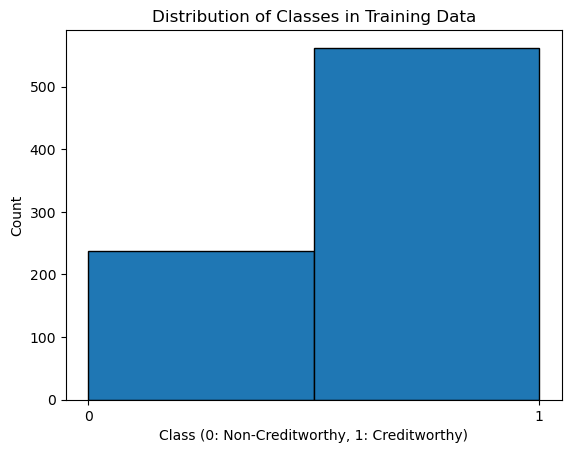

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [4]:
data.describe()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [5]:
# Создание модели Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=7000, C=0.5, penalty='l2', solver='newton-cg', random_state=42)
logistic_regression_model.fit(X_train, y_train)

# Создание модели Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=0.5, 
                                             min_samples_leaf=72, min_samples_split=15, 
                                             class_weight='balanced', random_state=42)
decision_tree_model.fit(X_train, y_train)

# Создание модели K-Nearest Neighbors
knn_model = KNeighborsClassifier(algorithm='auto', metric='canberra', n_neighbors=47, weights='distance')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='canberra', n_neighbors=47, weights='distance')

In [6]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print(f'Accuracy of Logistic Regression: {accuracy_logistic}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn}')

print()
print(f'ROC AUC of Logistic Regression: {roc_auc_logistic}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn}')
print()

print(f'Precision of Logistic Regression: {precision_logistic}')
print(f'Precision of Decision Tree: {precision_decision_tree}')
print(f'Precision of K-Nearest Neighbors: {precision_knn}')
print()

print(f'Recall of Logistic Regression: {recall_logistic}')
print(f'Recall of Decision Tree: {recall_decision_tree}')
print(f'Recall of K-Nearest Neighbors: {recall_knn}')

Accuracy of Logistic Regression: 0.76
Accuracy of Decision Tree: 0.695
Accuracy of K-Nearest Neighbors: 0.73

ROC AUC of Logistic Regression: 0.7932445067788686
ROC AUC of Decision Tree: 0.7463768115942029
ROC AUC of K-Nearest Neighbors: 0.7585320243104254

Precision of Logistic Regression: 0.7848101265822784
Precision of Decision Tree: 0.8290598290598291
Precision of K-Nearest Neighbors: 0.7307692307692307

Recall of Logistic Regression: 0.8985507246376812
Recall of Decision Tree: 0.7028985507246377
Recall of K-Nearest Neighbors: 0.9637681159420289


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

### Logistic Regression

In [7]:
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression(random_state=42)
param_grid = {'max_iter': [7000],
              'penalty': ['l2'],
              'solver': ['lbfgs', 'newton-cg'],
              'C': [0.5, 0.7, 0.9]
             }
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Model is fitted")

Model is fitted


In [8]:
best_model = grid_search.best_estimator_
print(f"Model params: {grid_search.best_params_}")
print(f"ROC AUC on train: {roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1])}")
print(f"ROC AUC on cross-validation: {grid_search.best_score_}")
print(f"ROC AUC on test: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")

Model params: {'C': 0.5, 'max_iter': 7000, 'penalty': 'l2', 'solver': 'newton-cg'}
ROC AUC on train: 0.8030144442118485
ROC AUC on cross-validation: 0.7729339404515337
ROC AUC on test: 0.7932445067788686


При max_iter меньше 7000 возникает предупреждение с рекомендацией повысить max_iter. Наилучшими solver оказались 'lbfgs' и 'newton-cg' среди всех (с разными penalty), коэффициент регуляризации C не сильно влияет на показатели. Итоговый показатель недотягивает до 0.8, но разница между показателями train, cv, test минимальна - модель хорошо обучилась, переобучения нет.

### KNN-model

In [9]:
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(25, 60),
              'weights': ['distance'],
              'algorithm': ['auto', 'ball_tree', 'brute'],
              'metric': ['canberra']
             }
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Model is fitted")

Model is fitted


In [10]:
best_model = grid_search.best_estimator_
print(f"Model params: {grid_search.best_params_}")
print(f"ROC AUC on train: {roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1])}")
print(f"ROC AUC on cross-validation: {grid_search.best_score_}")
print(f"ROC AUC on test: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")

Model params: {'algorithm': 'auto', 'metric': 'canberra', 'n_neighbors': 47, 'weights': 'distance'}
ROC AUC on train: 1.0
ROC AUC on cross-validation: 0.789703696449866
ROC AUC on test: 0.7585320243104254


Метрика canberra дает наилучший roc-auc среди всех, но с ней происходит переобучение (train roc-auc = 1). Показатель roc-auc на тесте ближе к 0.8 возможен только при n_neighbors ≈ 600, что является "подстраиванием" под данные.

### Desicion Tree

In [11]:
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4],
              'min_samples_split': range(15, 30, 2),
              'min_samples_leaf': range(60, 80, 2), 
              'class_weight': [None, 'balanced'],
              'max_features': np.arange(0.15, 0.8, 0.05)
             }
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Model is fitted")

Model is fitted


In [12]:
print(f"Params: {grid_search.best_params_}")
print(f"ROC AUC on train: {roc_auc_score(y_train, grid_search.predict_proba(X_train)[:, 1])}")
print(f"ROC AUC on cross-validation: {grid_search.best_score_}")
print(f"ROC AUC on test: {roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])}")

Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': np.float64(0.5000000000000001), 'min_samples_leaf': 72, 'min_samples_split': 15}
ROC AUC on train: 0.7546278297795986
ROC AUC on cross-validation: 0.7330707241708583
ROC AUC on test: 0.7463768115942029


Здесь были взяты неглубокие деревья (max_depth = 3, 4), они позволили избежать переобучения (разница между train, cv, test минимальна), а также большие листья (min_samples_leaf) по сравнению с размером выборки для разделения (min_samples_split). Возможно, что в задачах классификации кредитоспособности важнее сохранять большие группы для сохранения общих закономерностей.